### Amazon Cookbooks Topic Modeling Using Descriptions

In [112]:
from nlp_helper import *
%matplotlib inline

In [6]:
# --- Read cookbooks tables:  Products from meta_cookbooks.json and reviews from Cookbooks.json
ckbk_meta_file = "../data/amzn/meta_Cookbooks.json"
ckbk_reviews_file = "../data/amzn/Cookbooks.json"

ckbks = pd.read_json(ckbk_meta_file, lines=True)
print(ckbks.columns)

ckbks['cats'] = ckbks['category'].apply(lambda x: x[2] if len(x)==3 else x[1])
print(f"Total number of categories: {ckbks['cats'].value_counts().sum()}")
ckbks['cats'].value_counts()
      
switch_categories = {"Professional Cooking": "Cooking Education & Reference",
                    "Celebrities & TV Shows": "Cooking Education & Reference",
                    "Canning & Preserving": "Cooking Methods",
                    "Desserts": "Baking",
                    "Outdoor Cooking": "Cooking Methods",
                    "Quick & Easy": "Cooking Methods",
                   }

ckbks['new_category'] = ckbks['cats'].apply(lambda x: switch_categories[x] if x in switch_categories.keys() else x)
print(f"Total number of books: {ckbks['new_category'].value_counts().sum()}")
list(zip(ckbks['new_category'].value_counts().index, ckbks['new_category'].value_counts()))
      
ckbks.drop(['cats', 'also_buy', 'also_buy', 'brand', 'rank', 'also_view', 'main_cat', 'price', 'image', 'feature', 'date',
       'similar_item', 'details'], axis=1, inplace=True)



Index(['category', 'description', 'title', 'also_buy', 'brand', 'rank',
       'also_view', 'main_cat', 'price', 'asin', 'image', 'feature', 'date',
       'similar_item', 'details'],
      dtype='object')
Total number of categories: 44836
Total number of books: 44836


DO NOT Rerun the below cell...Instead read the pdf from the csv file: "../data/amzn/1.cookbooks_chkpoint.csv"

In [8]:
#---
ckbks['description'] = ckbks['description'].apply(lambda x: " ".join(x))
ckbks['title_clean'] = tokenize_col(ckbks['title'])
ckbks['desc_clean'] = tokenize_col(ckbks['description'])
ckbks.to_csv("../data/amzn/1.cookbooks_chkpoint.csv")

In [9]:
#ckbks = pd.read_csv("../data/amzn/1.cookbooks_chkpoint.csv", header=0, index_col=0)
#ckbks = pd.to_csv("../data/amzn/1.cookbooks_chkpoint.csv", index_col=0)
ckbks

,category,description,title,asin,new_category,title_clean,desc_clean
0,"[Books, Cookbooks, Food & Wine, Regional & Int...",Though at first glance too luscious for the po...,France: The Beautiful Cookbook- Authentic Reci...,0002154129,Regional & International,france beautiful authentic recipe region france,glance luscious pot pan grease stain kitchen o...
1,"[Books, Cookbooks, Food & Wine, Regional & Int...",Lorenza de Medici has published more than 30 c...,"Italy, The Beautiful Cookbook: Authentic Recip...",0002154463,Regional & International,italy beautiful authentic recipe region italy,lorenza medici publish appear series italian c...
2,"[Books, Cookbooks, Food & Wine, Regional & Int...",Two collections of California's best. The late...,"California, The Beautiful Cookbook: Authentic ...",0002159317,Regional & International,california beautiful authentic recipe california,collection california late addition collins po...
3,"[Books, Cookbooks, Food & Wine, Regional & Int...",Fifth in the series that includes the best-sel...,America: The Beautiful Cookbook,000215854X,Regional & International,america beautiful,fifth series include selling italy beautiful k...
4,"[Books, Cookbooks, Food & Wine, Regional & Int...",The latest addition to this popular series is ...,Mexico The Beautiful Cookbook: Authentic Recip...,000215949X,Regional & International,mexico beautiful authentic recipe region mexico,late addition popular series colorful guide me...
...,...,...,...,...,...,...,...
44831,"[Books, Cookbooks, Food & Wine, Special Diet]",Recipe Excerpts from The Joy Fit Club Chi...,"Joy Fit Club: Cookbook, Diet Plan & Inspiration",B01FMW2MZ6,Special Diet,joy fit club diet plan inspiration,recipe excerpt joy fit club chicken creamy gar...
44832,"[Books, Cookbooks, Food & Wine, Beverages & Wine]","""A fascinating look at the place and function ...",Drinking in America: Our Secret History,B01FMVXYF4,Beverages & Wine,drinking america secret history,fascinating look place function alcohol americ...
44833,"[Books, Cookbooks, Food & Wine]",ALL NEW 5th Edition to kick off 2017 with expa...,Entertaining with Vegetables: A Recipe Collect...,B01FUPYP0A,"Cookbooks, Food & Wine",entertain vegetable recipe collection modern m...,new th edition kick expanded recipe custom pub...
44834,"[Books, Cookbooks, Food & Wine]",Grit Country Series Magazine 2016 (Volume 10....,Grit Guide to Cast Iron Cooking Magazine 2016,B01FV1VJ66,"Cookbooks, Food & Wine",grit guide cast_iron magazine,grit country series magazine volume feature gu...


In [10]:
data = ckbks[["asin", "title", "title_clean", "description", "desc_clean"]].copy()

#--- Get length of titles and descriptions
data['desc_count'] = data['desc_clean'].apply(lambda x: len(x))
data['desc_ok']=data['desc_count'].apply(lambda x: 1 if (x>=5 and x < 3000) else 0)
data['title_count'] = data['title_clean'].apply(lambda x: len(x))
data['title_ok']=data['title_count'].apply(lambda x: 1 if (x < 100) else 0)

data['use_these']=data['desc_ok']*data['title_ok']
data[data['use_these']==1]

,asin,title,title_clean,description,desc_clean,desc_count,desc_ok,title_count,title_ok,use_these
0,0002154129,France: The Beautiful Cookbook- Authentic Reci...,france beautiful authentic recipe region france,Though at first glance too luscious for the po...,glance luscious pot pan grease stain kitchen o...,954,1,47,1,1
1,0002154463,"Italy, The Beautiful Cookbook: Authentic Recip...",italy beautiful authentic recipe region italy,Lorenza de Medici has published more than 30 c...,lorenza medici publish appear series italian c...,1912,1,45,1,1
2,0002159317,"California, The Beautiful Cookbook: Authentic ...",california beautiful authentic recipe california,Two collections of California's best. The late...,collection california late addition collins po...,593,1,48,1,1
3,000215854X,America: The Beautiful Cookbook,america beautiful,Fifth in the series that includes the best-sel...,fifth series include selling italy beautiful k...,351,1,17,1,1
4,000215949X,Mexico The Beautiful Cookbook: Authentic Recip...,mexico beautiful authentic recipe region mexico,The latest addition to this popular series is ...,late addition popular series colorful guide me...,721,1,47,1,1
...,...,...,...,...,...,...,...,...,...,...
44831,B01FMW2MZ6,"Joy Fit Club: Cookbook, Diet Plan & Inspiration",joy fit club diet plan inspiration,Recipe Excerpts from The Joy Fit Club Chi...,recipe excerpt joy fit club chicken creamy gar...,1430,1,34,1,1
44832,B01FMVXYF4,Drinking in America: Our Secret History,drinking america secret history,"""A fascinating look at the place and function ...",fascinating look place function alcohol americ...,2180,1,31,1,1
44833,B01FUPYP0A,Entertaining with Vegetables: A Recipe Collect...,entertain vegetable recipe collection modern m...,ALL NEW 5th Edition to kick off 2017 with expa...,new th edition kick expanded recipe custom pub...,440,1,74,1,1
44834,B01FV1VJ66,Grit Guide to Cast Iron Cooking Magazine 2016,grit guide cast_iron magazine,Grit Country Series Magazine 2016 (Volume 10....,grit country series magazine volume feature gu...,277,1,29,1,1


In [11]:
dataDesc=data[data['desc_ok']==1]['desc_clean'].copy()
ckbks_model = nlp_model(vect_method = "tfidf", dim_reduc="LSA", n_components = 10, n_clusters = 10)
ckbks_model.fit(dataDesc, save_fit = True, filename = "../model/TFIDF_LSA_Description.joblib")
#dr_data_desc = model.doc_dr_data
#print(dataTitles.info())

In [113]:
ckbks_model = load("../model/TFIDF_LSA_Description.joblib")

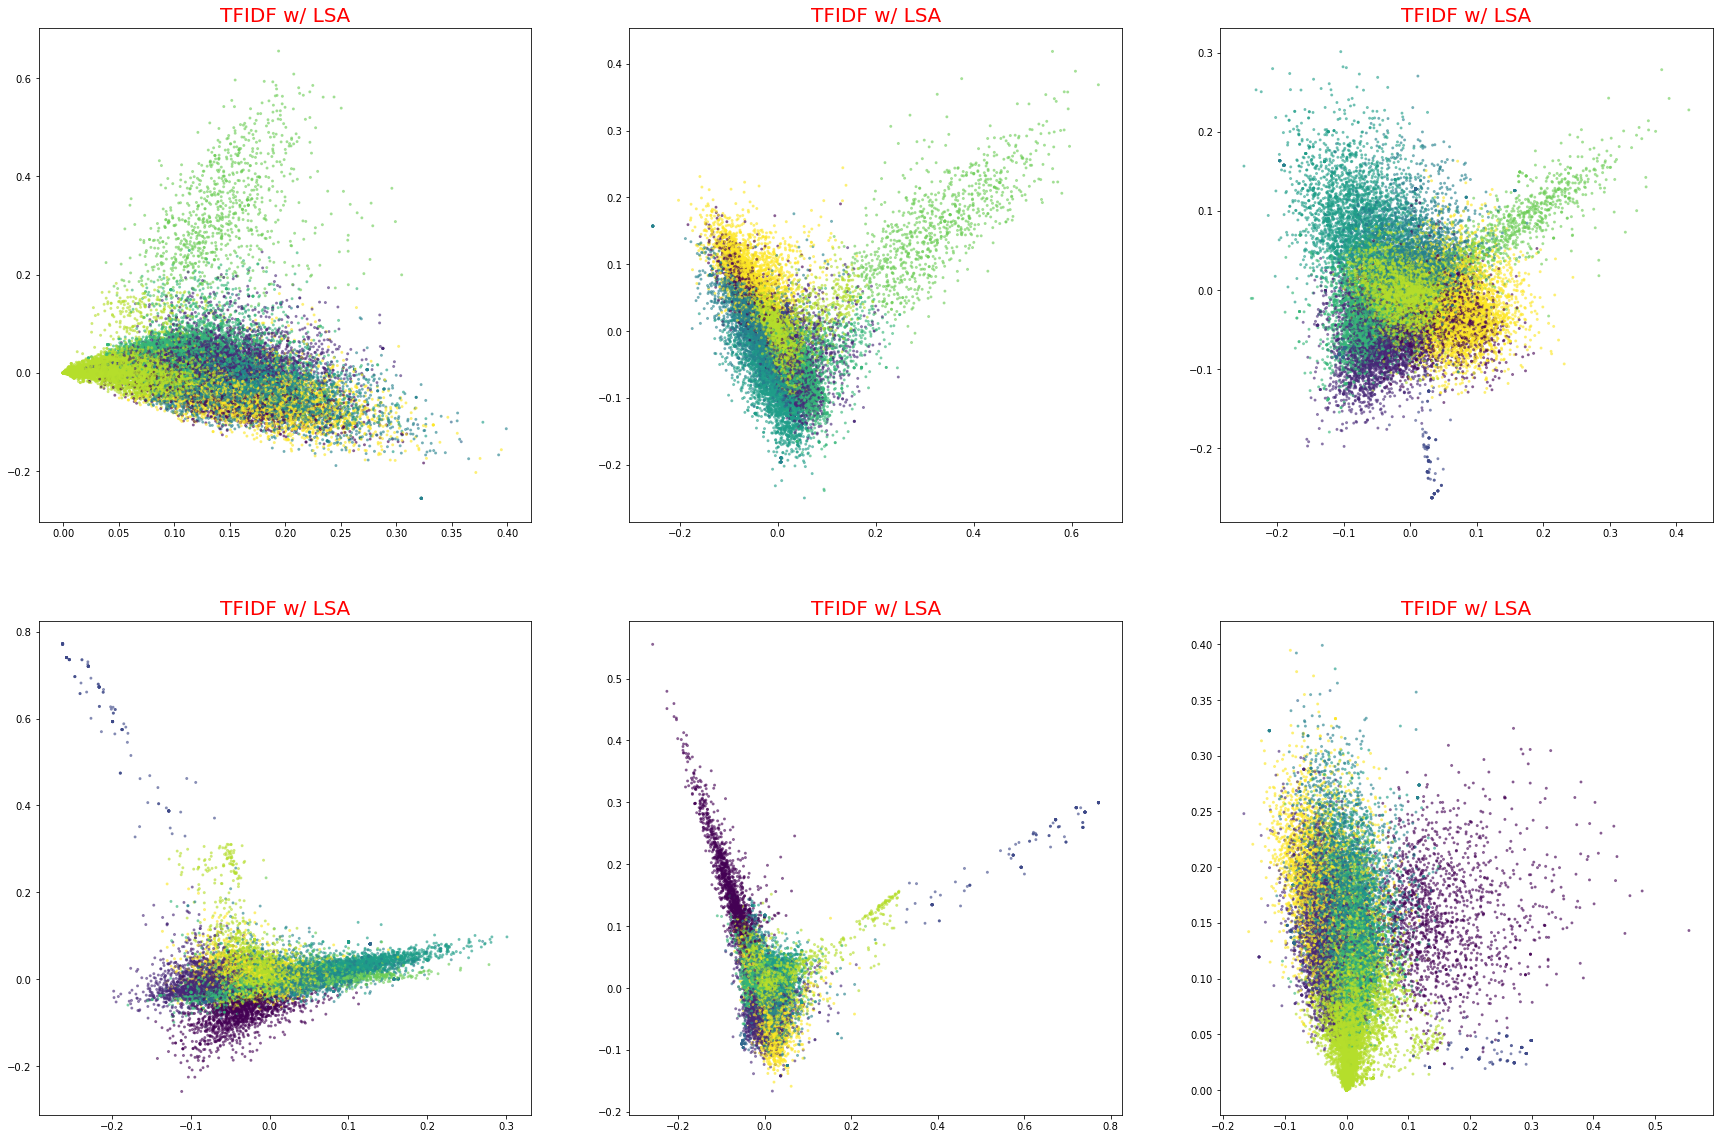

In [114]:
data_dr_lsa = ckbks_model.outputs['Dimensionality Reduction']
labels_lsa = ckbks_model.outputs['Clustering']
plot_all_dimensions(data_dr_lsa[:,:6], labels_lsa, title="TFIDF w/ LSA")

In [115]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

lsa_model = ckbks_model.objects['Dimensionality Reduction']
vect_words = ckbks_model.objects['Vectorization'].get_feature_names()
        
display_topics(lsa_model, vect_words, 30, topic_names=None)


Topic  0
recipe, make, author, wine, dish, chef, cooking, include, time, family, new, kitchen, easy, year, meal, ingredient, good, love, magazine, work, healthy, great, live, write, delicious, use, culinary, life, restaurant, eat

Topic  1
wine, magazine, award, writer, write, world, author, live, editor, year, work, new_york, win, travel, california, guide, winery, chef, restaurant, grape, publication, university, beer, spirit, region, drink, culinary, history, international, industry

Topic  2
wine, recipe, dish, soup, chicken, sauce, reed, bread, cake, dessert, cheese, salad, chocolate, ingredient, cream, vegetable, pasta, color, pie, chapter, italian, make, step, collection, meat, tomato, easy, potato, fish, roast

Topic  3
wine, healthy, health, diet, meal, vegan, easy, recipe, eat, nutrition, delicious, weight, help, family, love, lifestyle, life, make, gluten_free, enjoy, great, paleo, body, people, good, day, plan, booksumo, way, lose

Topic  4
text, english, translation, lang

In [116]:
print(len(ckbks_model.objects['Vectorization'].vocabulary_))
print(dataDesc)

88976
0        glance luscious pot pan grease stain kitchen o...
1        lorenza medici publish appear series italian c...
2        collection california late addition collins po...
3        fifth series include selling italy beautiful k...
4        late addition popular series colorful guide me...
                               ...                        
44831    recipe excerpt joy fit club chicken creamy gar...
44832    fascinating look place function alcohol americ...
44833    new th edition kick expanded recipe custom pub...
44834    grit country series magazine volume feature gu...
44835    planet foundation inspire experience team work...
Name: desc_clean, Length: 30587, dtype: object


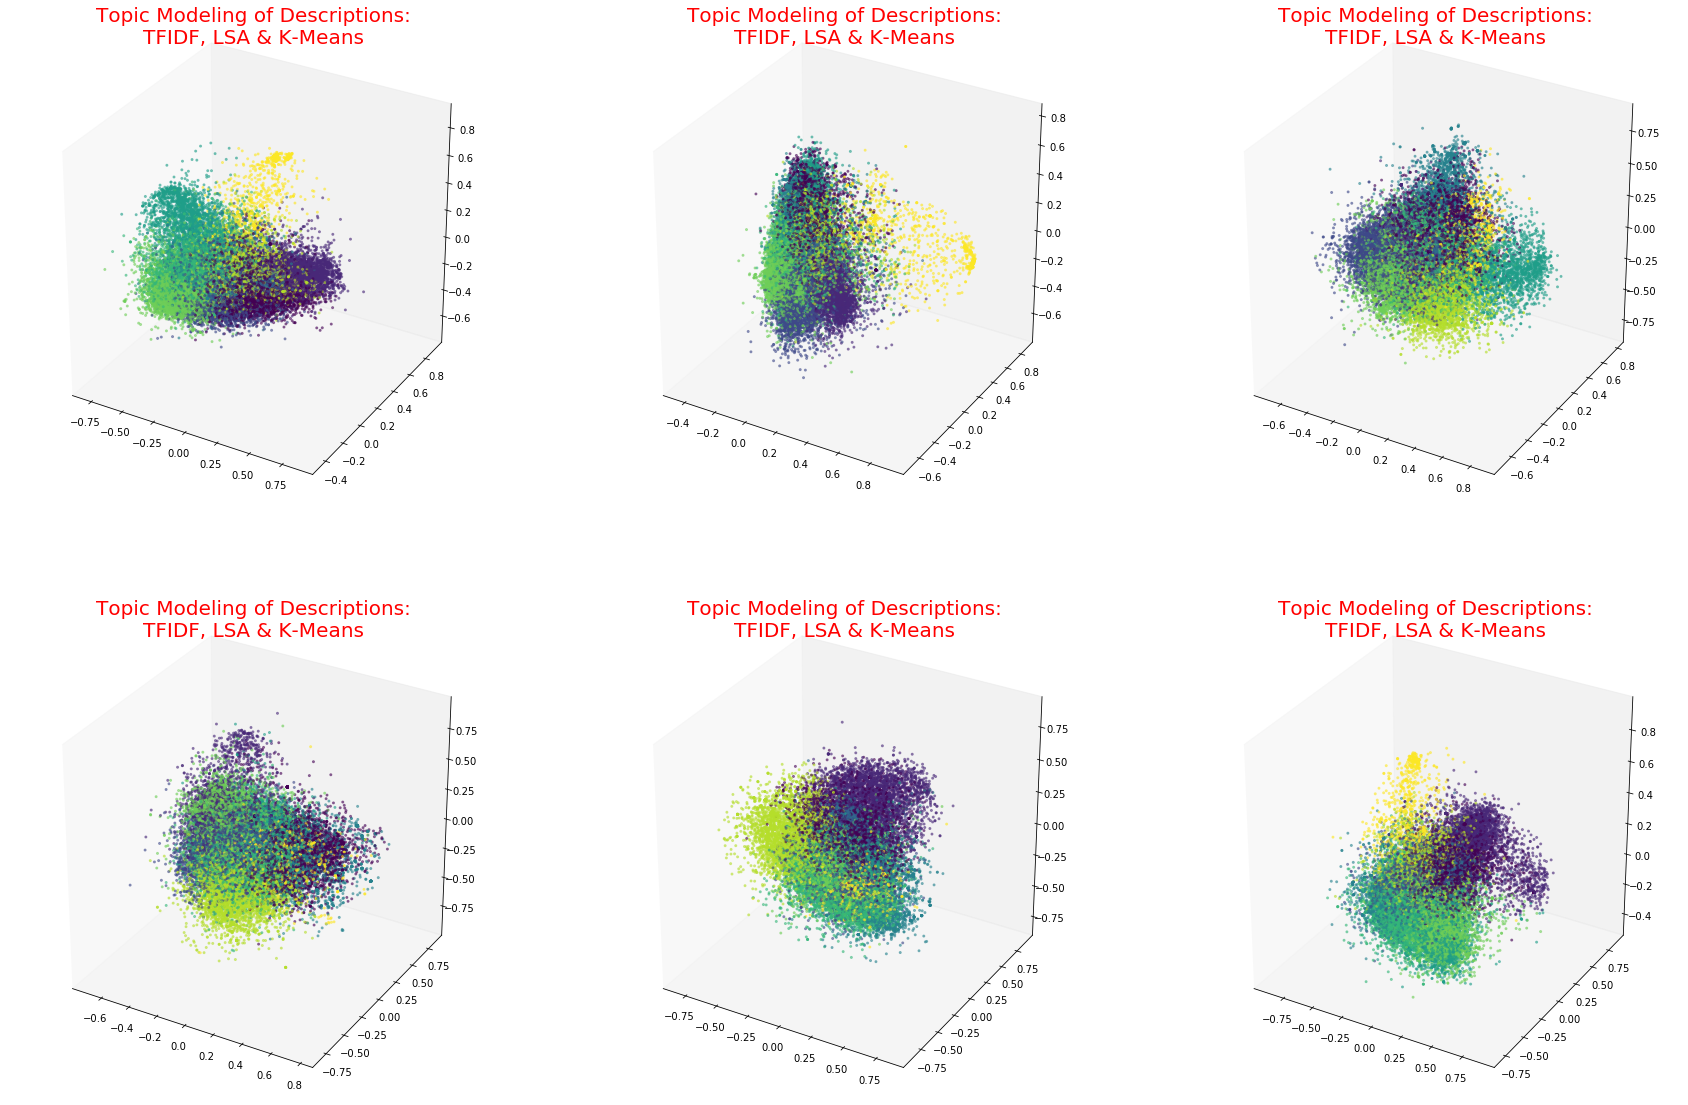

In [117]:
data_norm = normalize(data_dr_lsa)
new_kmeans = KMeans(n_clusters=10, random_state=30)
new_kmeans.fit(data_norm)
new_labels = new_kmeans.labels_
plot_all_dimensions3D(data_norm[:,3:9], new_labels, titles="Topic Modeling of Descriptions:\nTFIDF, LSA & K-Means")

In [118]:
dataDesc = ckbks_model.dataNLP
dataDesc#.drop(['labels', 'lsa_norm'], inplace=True)

0        glance luscious pot pan grease stain kitchen o...
1        lorenza medici publish appear series italian c...
2        collection california late addition collins po...
3        fifth series include selling italy beautiful k...
4        late addition popular series colorful guide me...
                               ...                        
44831    recipe excerpt joy fit club chicken creamy gar...
44832    fascinating look place function alcohol americ...
44833    new th edition kick expanded recipe custom pub...
44834    grit country series magazine volume feature gu...
44835    planet foundation inspire experience team work...
Name: desc_clean, Length: 30587, dtype: object

In [119]:
#ckbks.to_csv("../data/amzn/1.cookbooks_chkpoint.csv")
ckbks = pd.read_csv("../data/amzn/1.cookbooks_chkpoint.csv", index_col=0)

data = ckbks[["asin", "title", "title_clean", "description", "desc_clean"]].copy()

#--- Get length of titles and descriptions
data['desc_clean'] = data['desc_clean'].fillna("")
data['desc_count'] = data['desc_clean'].apply(lambda x: len(x.split()))
data['desc_ok']=data['desc_count'].apply(lambda x: 1 if (x>=5 and x < 3000) else 0)
data['title_clean'] = data['title_clean'].fillna("")
data['title_count'] = data['title_clean'].apply(lambda x: len(x))
data['title_ok']=data['title_count'].apply(lambda x: 1 if (x < 100) else 0)

data['use_these']=data['desc_ok']*data['title_ok']
data[data['use_these']==1]

,asin,title,title_clean,description,desc_clean,desc_count,desc_ok,title_count,title_ok,use_these
0,0002154129,France: The Beautiful Cookbook- Authentic Reci...,france beautiful authentic recipe region france,Though at first glance too luscious for the po...,glance luscious pot pan grease stain kitchen o...,129,1,47,1,1
1,0002154463,"Italy, The Beautiful Cookbook: Authentic Recip...",italy beautiful authentic recipe region italy,Lorenza de Medici has published more than 30 c...,lorenza medici publish appear series italian c...,299,1,45,1,1
2,0002159317,"California, The Beautiful Cookbook: Authentic ...",california beautiful authentic recipe california,Two collections of California's best. The late...,collection california late addition collins po...,79,1,48,1,1
3,000215854X,America: The Beautiful Cookbook,america beautiful,Fifth in the series that includes the best-sel...,fifth series include selling italy beautiful k...,47,1,17,1,1
4,000215949X,Mexico The Beautiful Cookbook: Authentic Recip...,mexico beautiful authentic recipe region mexico,The latest addition to this popular series is ...,late addition popular series colorful guide me...,91,1,47,1,1
...,...,...,...,...,...,...,...,...,...,...
44831,B01FMW2MZ6,"Joy Fit Club: Cookbook, Diet Plan & Inspiration",joy fit club diet plan inspiration,Recipe Excerpts from The Joy Fit Club Chi...,recipe excerpt joy fit club chicken creamy gar...,199,1,34,1,1
44832,B01FMVXYF4,Drinking in America: Our Secret History,drinking america secret history,"""A fascinating look at the place and function ...",fascinating look place function alcohol americ...,282,1,31,1,1
44833,B01FUPYP0A,Entertaining with Vegetables: A Recipe Collect...,entertain vegetable recipe collection modern m...,ALL NEW 5th Edition to kick off 2017 with expa...,new th edition kick expanded recipe custom pub...,59,1,74,1,1
44834,B01FV1VJ66,Grit Guide to Cast Iron Cooking Magazine 2016,grit guide cast_iron magazine,Grit Country Series Magazine 2016 (Volume 10....,grit country series magazine volume feature gu...,39,1,29,1,1


In [120]:
from scipy.spatial import distance

def closest2clustersN(data, data_lsa_norm, labels, clusters, no_of_books=10):
    def dist(f):
        return distance.euclidean(f['lsa_norm'], f['centroids'])
        
    data = data.to_frame()
    data['labels'] = np.array(labels)
    data['lsa_norm'] = data_lsa_norm.tolist()
    data['centroids'] = data['labels'].apply(lambda x: clusters[x].tolist())
    data['dist2cents'] = data.apply(dist, axis=1)
    subset = data.groupby('labels')['dist2cents'].nlargest(no_of_books).reset_index().copy()
    
    #subset.merge(asins, how='inner', left_on = 'level_1', right_index=True).copy()
    #subset.merge(asins, left_index = True, right_index=True, how = 'inner', copy = True)
    return subset

closest2clusters = closest2clustersN(dataDesc, data_norm, new_labels, new_kmeans.cluster_centers_, no_of_books=100)
closest2clusters = closest2clusters.merge(data['asin'], how='inner', left_on = 'level_1', right_index=True).copy()

In [127]:
def plotCookbooks(asins, showMissing = False):
    check_asins = []
    covers_loc = "../data/amzn/covers/"
    
    no_of_images = max(len(asins), 25)
    row_images = 1 + (no_of_images-1)//5
    image_size = (400, 400)
    
    #plt.rcParams['figure.figsize'] = [20, 20]
    #plt.figure(figsize=(row_images*10,5*10))
    count = 1
    for asin in asins:
        try:
            filePath = covers_loc + str(asin)+".jpg"
            img = image.load_img(filePath, target_size=image_size)
        except:
            img = np.ones((image_size[0], image_size[1], 3))
        plt.subplot(row_images, 5, count)
        plt.axis("off")
        plt.imshow(img, aspect='equal')
        if count == 25:
            break
        count += 1
    plt.axis("off")
    #plt.subplots_adjust(hspace=0, wspace=0)
    plt.subplots_adjust(wspace=None, hspace=None)
    plt.tight_layout()
    plt.show();

In [122]:
#plotCookbooks(closest2clusters[closest2clusters['labels']==1]['asin'])
import os
covers_loc = "../data/amzn/covers/"
asins_with_covers = [f for f in os.listdir(covers_loc) if os.path.isfile(os.path.join(covers_loc, f)) and ".jpg" in f]
closest2clusters["wpics"] = closest2clusters['asin'].apply(lambda x: 1 if str(x+".jpg") in asins_with_covers else 0)

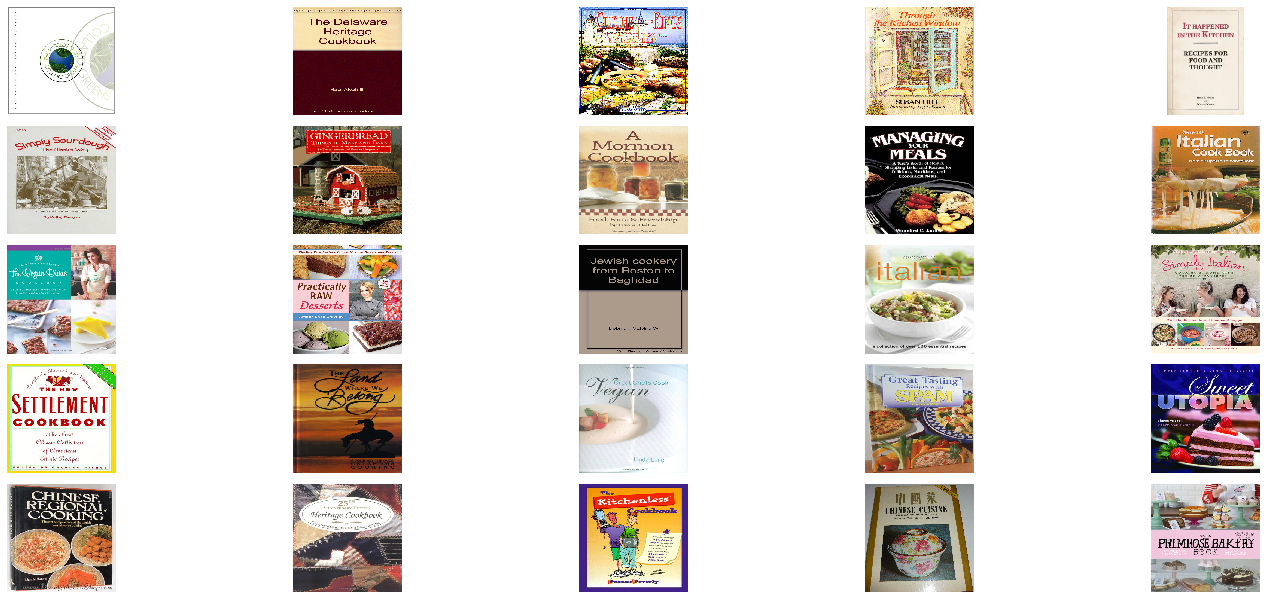

In [171]:
from keras.preprocessing import image
#print(cluster0)
pics1 = list(closest2clusters[(closest2clusters['labels']==7)*(closest2clusters['wpics']==1)]['asin'])
plt.rcParams['figure.figsize'] = [20, 20]
plotCookbooks(pics1)
#closest2clusters
#list(closest2clusters[closest2clusters['labels']==1]['asin'])

In [173]:
#from scipy.spatial import distance
from sklearn.metrics.pairwise import cosine_similarity
def similarClustersN(data, data_lsa_norm, labels, clusters, no_of_books=10):
    def dist(f):
        arr1 = np.array(f['lsa_norm']).reshape(1, -1)
        arr2 = np.array(f['centroids']).reshape(1, -1)
        sim = cosine_similarity(arr1,arr2)
        
        return float(sim)
        
    data = data.to_frame()
    data['labels'] = np.array(labels)
    data['lsa_norm'] = data_lsa_norm.tolist()
    data['centroids'] = data['labels'].apply(lambda x: clusters[x].tolist())
    data['dist2cents'] = data.apply(dist, axis=1)
    subset = data.groupby('labels')['dist2cents'].nlargest(no_of_books).reset_index().copy()
    
    #subset.merge(asins, how='inner', left_on = 'level_1', right_index=True).copy()
    #subset.merge(asins, left_index = True, right_index=True, how = 'inner', copy = True)
    return subset

simN = similarClustersN(dataDesc, data_norm, new_labels, new_kmeans.cluster_centers_, no_of_books=150)
simN = simN.merge(data['asin'], how='inner', left_on = 'level_1', right_index=True).copy()
covers_loc = "../data/amzn/covers/"
asins_with_covers = [f for f in os.listdir(covers_loc) if os.path.isfile(os.path.join(covers_loc, f)) and ".jpg" in f]
simN["wpics"] = simN['asin'].apply(lambda x: 1 if str(x+".jpg") in asins_with_covers else 0)



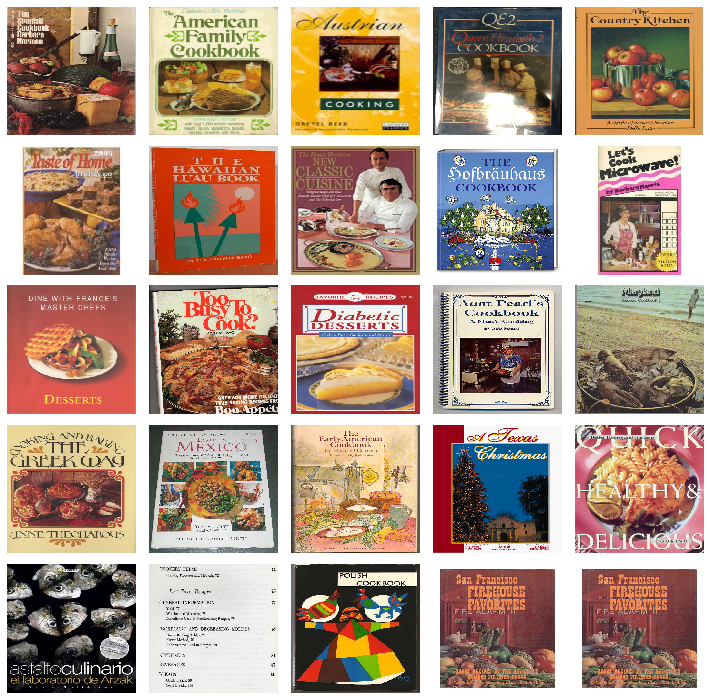

In [206]:
plt.rcParams['figure.figsize'] = [10, 35]
pics_sim = list(simN[(simN['labels']==9)*(simN['wpics']==1)]['asin'])
plotCookbooks(pics_sim)